In [1]:
import keras
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWar

In [2]:
Batsman_train = pd.read_csv('Bat_Trainset.csv', header = 0)
Bowler_train = pd.read_csv('Bowl_Trainset.csv', header = 0)


Bowler_train['Opp_SR'].replace([np.inf,-np.inf],np.nan)
Bowler_train['Opp_avg'].replace([np.inf,-np.inf],np.nan)
Bowler_train['Ven_SR'].replace([np.inf,-np.inf],np.nan)
Bowler_train['Ven_avg'].replace([np.inf,-np.inf],np.nan)



Bowler_train['Opp_SR'].fillna(0, inplace = True)
Bowler_train['Opp_avg'].fillna(0, inplace = True)
Bowler_train['Ven_SR'].fillna(0, inplace = True)
Bowler_train['Ven_avg'].fillna(0, inplace = True)

In [5]:
x = Batsman_train.iloc[:,3:-1]
y = Batsman_train.iloc[:,-1]
x
y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42, shuffle=True)



Baseline: -915.01 (431.87) MSE


In [ ]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, input_dim=30, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(50, input_dim=50, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(9, input_dim=30, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    #print(model)
    return model

MODEL = baseline_model
# evaluate model
estimator = KerasRegressor(build_fn=MODEL, epochs=40, batch_size=5, verbose=0)
kfold = KFold(n_splits=12)
results = cross_val_score(estimator, x, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [6]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(MODEL, 'Batsman.pkl') 
  

['Batsman.pkl']

In [7]:
X = Bowler_train.iloc[:,3:-1]
Y = Bowler_train.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42, shuffle=True)


# define Bowler base model
def bowler_model():
    # create model
    model = Sequential()
    model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, input_dim=30, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(30, input_dim=30, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(9, input_dim=9, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    #print(model)
    return model

BOWLER_MODEL = baseline_model
# evaluate model
estimator = KerasRegressor(build_fn=BOWLER_MODEL, epochs=40, batch_size=5, verbose=0)
kfold = KFold(n_splits=12)
results = cross_val_score(estimator, x, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -989.32 (652.07) MSE


In [11]:

from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(BOWLER_MODEL, 'Bowler.pkl') 
  
# Load the model from the file 
model_for_Bowler = joblib.load('Bowler.pkl')  
  
# Use the loaded model to make predictions 
model_for_Bowler.predict(X_test) 



AttributeError: 'function' object has no attribute 'predict'

In [123]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import ensemble

In [124]:
x = Batsman_train.iloc[:,3:-1]
y = Batsman_train.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42, shuffle=True)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
	  'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)

model.fit(x_train, y_train)
print(x_train)
print(y_train)

      Tot_runs    Tot_SR    Tot_avg  Opp_runs    Opp_SR    Opp_avg  Ven_runs  \
809       3824  0.915051  40.680851       598  0.991708  35.176471        52   
707        115  0.777027   4.423077        24  0.774194   4.800000         3   
1062        77  0.583333   4.052632        17  0.850000   5.666667         0   
660       1242  0.930337  28.227273         4  0.222222   2.000000        40   
976         57  1.036364   8.142857         1  0.500000   1.000000         2   
...        ...       ...        ...       ...       ...        ...       ...   
121         10  0.909091  10.000000        10  0.909091  10.000000        10   
1044        37  0.973684  37.000000        37  0.973684  37.000000        37   
1095        41  0.694915   8.200000        16  0.842105   8.000000         6   
860       1239  0.923937  35.400000       401  0.934732  44.555556       126   
1126         7  0.333333   7.000000         7  0.333333   7.000000         7   

        Ven_SR  Ven_avg  
809   1.01960

R2 sq:  0.8872557395404411
Mean squared error: 533.15
Test Variance score: 0.79


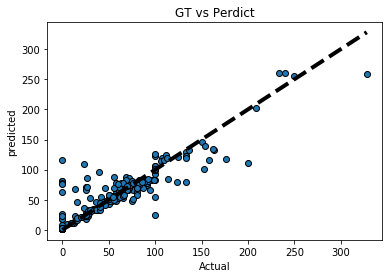

[  1.66029461  73.97450094  10.22455205  11.28033717  48.59512415
 110.96729209  79.51785141  23.598708     1.43645302 129.9359826
   1.66029461  53.28261469  49.68422724  77.12588383  54.384409
 123.4685333  120.40352596  87.83033422  74.20289449 119.93989975
  73.50537303  33.03206119  66.78478654   2.36443045 122.65586521
  84.8351074   81.72833624  11.71646312  73.93172947  74.79305131
  54.49022013  46.53273707  73.67782915  33.24130499 125.1875718
   1.66029461  62.41893644  52.83459777  17.46819796  52.25182571
  33.97458183  70.12812508  23.91629338  78.49477578  24.17737575
  35.50465282 114.61800387  80.00193898  31.71315488  73.00400537
 105.85795996 124.49565913  22.60269528  82.14245716  56.3288802
  53.97685126 108.98708327 103.63926782  48.30513158   1.66029461
 122.52143101 260.17343373  45.97004336 255.76380377  23.43506201
  42.48777661   1.66029461  87.02628789   1.5820704  116.79402309
  14.82800263  80.04137508  79.62597034  36.91609565  28.55835027
  47.49122407  

In [125]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_train, y_train)

print('R2 sq: ', model_score)

y_predicted = model.predict(x_test)
#print(y_test)
#print(y_predicted)
#mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))

#explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('predicted')
ax.set_title("GT vs Perdict")
plt.show()
print(y_predicted)

In [61]:
x = Bowler_train.iloc[:,3:-1]
y = Bowler_train.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42, shuffle=True)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
	  'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)

try:
    model.fit(x_train, y_train)
except ValueError:
    print('Error occurred')

from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_train, y_train)

print('R2 sq: ', model_score)

y_predicted = model.predict(x_test)
#print(y_test)
#print(y_predicted)
#mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))

#explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('predicted')
ax.set_title("GT vs Perdict")
plt.show()



Error occurred


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [45]:
def input_call():
    f = open('./input_data_1.csv','w')
    writer = csv.DictWriter(f,fieldnames=['NAME','OPPONENT','VENUE'])
    writer.writeheader()
    f.close()
    input_list_team1=[]
    input_list_team2=[]
    input_list=[]
    in_team1=input("Enter the team1 name : ")
    in_team2=input("Enter the team2 name : ")
    in_venue=input("Enter the venue : ")
    print("Plz enter the players playing today for ", in_team1)
    for i in range(11):
        temp=input("Enter player : ")
        input_list.append(temp)
        input_list_team1.append(temp)
        input_fields=pd.DataFrame({'NAME':[temp] ,'OPPONENT':[in_team2],'VENUE':[in_venue]})
        with open('./input_data_1.csv','a') as bd:
            input_fields.to_csv(bd,header=False,index=False)
    print("Plz enter the players playing today for ", in_team2)
    for i in range(11):
        temp=input("Enter player : ")
        input_list.append(temp)
        input_list_team2.append(temp)    
        input_fields=pd.DataFrame({'NAME':[temp] ,'OPPONENT':[in_team1],'VENUE':[in_venue]})
        with open('./input_data_1.csv','a') as bd:
            input_fields.to_csv(bd,header=False,index=False)
        



input_call()

Enter the team1 name : England
Enter the team2 name : Sri Lanka
Enter the venue : Headingley
Plz enter the players playing today for  England
Enter player : ME Trescothick
Enter player : AN Cook
Enter player : IR Bell
Enter player : AJ Strauss
Enter player : VS Solanki
Enter player : JWM Dalrymple
Enter player : GO Jones
Enter player : TT Bresnan
Enter player : LE Plunkett
Enter player : 
Enter player : Kabir Ali
Plz enter the players playing today for  Sri Lanka
Enter player : SL Malinga
Enter player : MF Maharoof
Enter player : ST Jayasuriya
Enter player : CRD Fernando
Enter player : WU Tharanga
Enter player : DPMD Jayawardene
Enter player : KC Sangakkara
Enter player : WPUJC Vaas
Enter player : TM Dilshan
Enter player : HMCM Bandara
Enter player : 


In [37]:
x_train

,Tot_wkts,Tot_SR,Tot_avg,Opp_wkts,Opp_SR,Opp_avg,Ven_wkts,Ven_SR,Ven_avg
677,12,41.333333,35.583333,0,0.000000,0.000000,0,0.0,0.0
521,1,48.000000,44.000000,0,0.000000,0.000000,0,0.0,0.0
741,177,33.689266,22.440678,12,36.666667,22.000000,1,43.0,32.0
363,3,40.666667,43.000000,0,inf,inf,0,0.0,0.0
693,3,56.333333,46.666667,0,0.000000,0.000000,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
106,1,81.000000,65.000000,0,0.000000,0.000000,0,inf,inf
270,0,inf,inf,0,0.000000,0.000000,0,0.0,0.0
860,6,21.333333,15.000000,3,22.666667,13.666667,0,0.0,0.0
435,7,28.857143,29.571429,0,0.000000,0.000000,0,0.0,0.0


In [52]:
Input = pd.read_csv('input_data_1.csv', header = 0)
data_ref=pd.read_csv('Bat_Trainset.csv',header =0)
data_ref

,player,Venue,Opponent,Tot_runs,Tot_SR,Tot_avg,Opp_runs,Opp_SR,Opp_avg,Ven_runs,Ven_SR,Ven_avg,Performance
0,A Bagai,Maple Leaf North-West Ground,Netherlands,558,0.632653,31.000000,26,0.382353,13.000000,8,0.222222,4.000000,17
1,A Balbirnie,|||||||Civil Service Cricket Club|||,Zimbabwe,839,0.723900,25.424242,253,0.829508,36.142857,26,0.666667,8.666667,55
2,A Codrington,Jaffery Sports Club Ground,Kenya,5,0.714286,5.000000,5,0.714286,5.000000,5,0.714286,5.000000,71
3,A Dananjaya,|||||||R.Premadasa Stadium|||,Bangladesh,7,0.333333,3.500000,0,0.000000,0.000000,0,0.000000,0.000000,0
4,A Flintoff,|||||||Beausejour Stadium|||,West Indies,781,0.855422,22.314286,43,0.716667,10.750000,3,0.428571,1.500000,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,Zeeshan Maqsood,Mannofield Park,Papua New Guinea,26,0.490566,6.500000,25,0.609756,12.500000,26,0.490566,6.500000,50
1126,Zeeshan Siddiqi,Hagley Oval,Scotland,7,0.333333,7.000000,7,0.333333,7.000000,7,0.333333,7.000000,33
1127,Ziaur Rahman,Shere Bangla National Stadium,India,124,1.097345,11.272727,20,1.176471,6.666667,14,0.736842,4.666667,0
1128,Zulfiqar Babar,Shere Bangla National Stadium,Bangladesh,35,0.875000,7.000000,1,0.250000,1.000000,1,0.250000,1.000000,25


In [112]:
a=int(Input['NAME'].count())
cnt=[]
for i in range (a):
    temp = data_ref[data_ref.player == Input['NAME'][i]]
    temp = temp[temp.Opponent == Input['OPPONENT'][i]]
    temp = temp[temp.Venue == Input['VENUE'][i]]
    if (temp.empty == False ):
            temp=temp.drop(['player','Venue','Opponent'],axis = 1)
            cnt.append(temp)

In [117]:
X = cnt[0].iloc[:, :-1]
Y = cnt[0].iloc[:, -1]

In [126]:
prediction = model.predict(X)
prediction

array([122.10031055])

In [127]:
Y

1082    125
Name: Performance, dtype: int64

In [128]:
cnt

[      Tot_runs    Tot_SR  Tot_avg  Opp_runs    Opp_SR  Opp_avg  Ven_runs  \
 1082        71  0.865854    17.75        54  1.018868     27.0        44   
 
         Ven_SR  Ven_avg  Performance  
 1082  1.257143     44.0          125  ,
      Tot_runs    Tot_SR    Tot_avg  Opp_runs    Opp_SR  Opp_avg  Ven_runs  \
 346       181  0.891626  20.111111        74  1.042254     14.8         2   
 
      Ven_SR  Ven_avg  Performance  
 346     0.4      2.0           40  ]